In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs

import tensorflow as tf
import tensorflow_addons as tfa



gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

path = './imagenes_derechas/*'

In [2]:
img_files = list(glob.glob(path))
img_files

['./imagenes_derechas/Ficheros_Represores_Figueroa_Figueroa_Ruben_Figueroa_Figueroa_Ruben_1_Figueroa_Figueroa_Ruben-2-.JPG',
 './imagenes_derechas/Ficheros_VARP_DFS,_Fichas_VARP_DFS,_fichas,_VARP-16-.JPG',
 './imagenes_derechas/Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Martha_Perez_Lopez_Martha-41-.JPG',
 './imagenes_derechas/Ficheros_PDLP_militantes_Avila_Almazan_Alejandro_Avila_Almazan_Alejandro-5-.JPG',
 './imagenes_derechas/Ficheros_Movimiento_de_Accion_Revolucionaria_Cisneros_Zavala_Martha_Elba_Cisneros_Zavala_Martha_Elba-72-.JPG',
 './imagenes_derechas/Ficheros_Represores_Acosta_Viquez_Carlos_Ulises_IMG_6582.JPG',
 './imagenes_derechas/Ficheros_Copreros_59-04-11_a_67-04-22_COPREROS_FICHAS-35-.JPG',
 './imagenes_derechas/Ficheros_Represores_Hernandez_Alcaraz_Horacio_Hernandez_Alcaraz_Horacio-47-.JPG',
 './imagenes_derechas/Ficheros_Carmelo_Cortes_Castro_Fichas_1_Carmelo_cortes-92-.JPG',
 './imagenes_derechas/Ficheros_UAG_76-04-05_a_76-11-15_UAG,_fichas-29-.JPG',
 './imagenes_de

In [3]:
import random

In [4]:
random.shuffle(img_files)

In [5]:
img_files

['./imagenes_derechas/Ficheros_UAG_72-02-29_a_73-05-11_UAG,_fichas-101-.JPG',
 './imagenes_derechas/Ficheros_Detenidos_Desaparecidos_Cabanas_Ocampo_Eleno_Cabanas_Ocampo_Eleno-2-.JPG',
 './imagenes_derechas/Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-39-.JPG',
 './imagenes_derechas/Ficheros_Movimiento_de_Accion_Revolucionaria_Cisneros_Zavala_Martha_Elba_Cisneros_Zavala_Martha_Elba-62-.JPG',
 './imagenes_derechas/Ficheros_Asociacion_Civica_Guerrerense_62-12-30_a_66-11-28_ACG,_fichas-36-.JPG',
 './imagenes_derechas/Ficheros_PDLP_militantes_Avila_Almazan_Alejandro_Avila_Almazan_Alejandro-6-.JPG',
 './imagenes_derechas/Ficheros_Represores_Acosta_Viquez_Carlos_Ulises_IMG_6602.JPG',
 './imagenes_derechas/Ficheros_LC23S_Corral_Garcia_Luis_Miguel_Corral_Garcia_Luis_Miguel-49-.JPG',
 './imagenes_derechas/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-106-.JPG',
 './imagenes_derechas/Ficheros_Asociacion_Civica_Guerrerense_82-01-22_a_83-11-12_ACG_fichas-1-.JPG',
 './imagenes_derechas/Ficheros_ACNR_

In [6]:
len(img_files)

1459

In [7]:
1459 / 4

364.75

In [8]:
364*3

1092

In [9]:
size = 1092
raw_train_ds = tf.data.Dataset.from_tensor_slices(img_files[:size]).cache()
raw_test_ds = tf.data.Dataset.from_tensor_slices(img_files[size:])

In [10]:
tf.data.experimental.cardinality(raw_train_ds).numpy(), tf.data.experimental.cardinality(raw_test_ds).numpy()

(1092, 367)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

tf.Tensor(0, shape=(), dtype=int32)


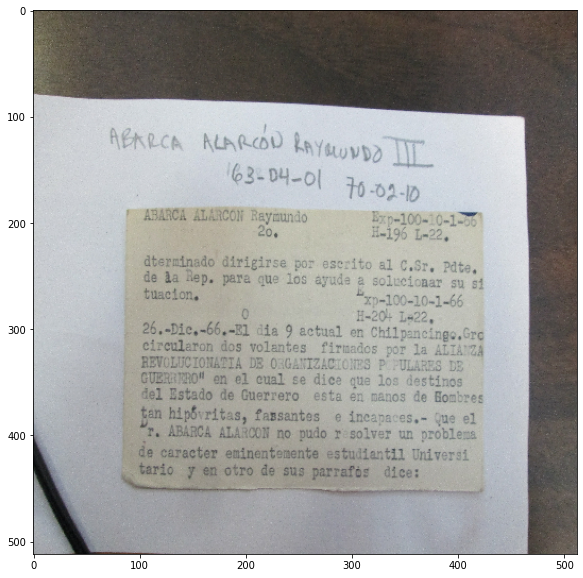

In [168]:
def convert(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [512, 512])
    #rand_int = tf.random.uniform([], minval=0, maxval=50, dtype=tf.dtypes.int32)
    #rand_int = tf.cast(n, tf.float32)
    rand = tf.random.uniform([], minval=0, maxval=4, dtype=tf.dtypes.int32)
    rotate = tf.image.rot90(img, k=rand)

    return rotate, rand

batch_size = 16
train_batches = raw_train_ds.shuffle(800).map(convert).batch(batch_size, num_parallel_calls=AUTOTUNE)
test_batches = raw_test_ds.map(convert, num_parallel_calls=AUTOTUNE).batch(batch_size, 
                                              num_parallel_calls=AUTOTUNE).cache()

for i, angle in train_batches.take(1):
    i = tf.cast(i, tf.uint8)
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(i[0])
    print(angle[0])

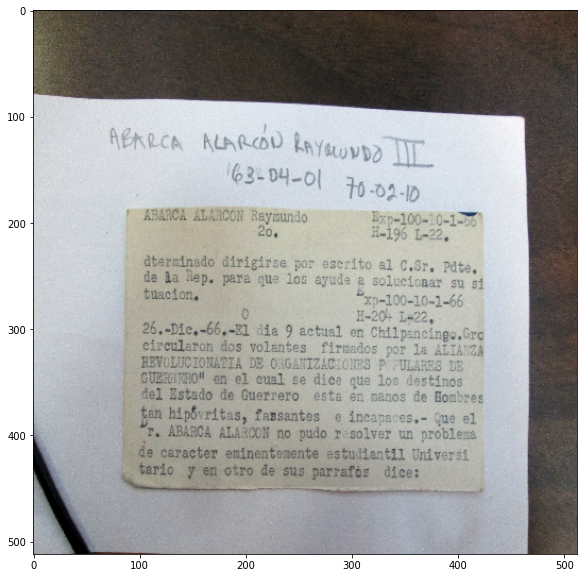

In [190]:
j = layers.experimental.preprocessing.RandomContrast(0.9)(i)
fig = plt.figure(figsize=(10, 10))
rotate = tf.image.rot90(j[0], 4)
plt.imshow(rotate)

In [14]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import activations

In [191]:
class CNN(tf.keras.models.Model):
    def __init__(self):
        super(CNN, self).__init__()
        d_model = 128
        self.aug = tf.keras.Sequential([
            #layers.experimental.preprocessing.RandomZoom(0.3, fill_mode='reflect'),
            layers.experimental.preprocessing.RandomContrast(0.9),

            layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1),
            #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
            layers.experimental.preprocessing.RandomRotation(0.1),
            layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
            
        ])
        self.conv_1 = tf.keras.Sequential([
            layers.Conv2D(32, kernel_size=5, 
                          strides=1, padding='same'),
            layers.Activation(activations.relu),
            layers.Conv2D(32, kernel_size=5, 
                          strides=1, padding='same'),
        ])
        self.res_1 = layers.Conv2D(32, kernel_size=1, strides=1, padding='same')
        
        self.conv_2 = tf.keras.Sequential([
            layers.Conv2D(64, kernel_size=3,
                          strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.Activation(activations.relu),
            layers.Conv2D(64, kernel_size=3,
                          strides=1, padding='same'),
            layers.BatchNormalization(),
        ])
        self.res_2 = layers.Conv2D(64, kernel_size=1, strides=2, padding='same')

        
        self.conv_3 = tf.keras.Sequential([
            layers.Conv2D(64, kernel_size=3,
                          strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.Activation(activations.relu),
            layers.Conv2D(64, kernel_size=3,
                          strides=1, padding='same'),
            layers.BatchNormalization(),
        ])
        self.res_3 = layers.Conv2D(64, kernel_size=1, strides=2, padding='same')
        self.flat = tf.keras.layers.GlobalAveragePooling2D()

        
        self.angle = tf.keras.Sequential([
            layers.Dense(32),
            layers.LeakyReLU(),
            layers.Dropout(0.3),
            layers.Dense(4, activation='softmax')
        ])
    
    def call(self, inp, training=False):
        x = self.aug(inp)
        skip_1 = self.res_1(x)
        x = tf.nn.relu(self.conv_1(x) + skip_1)
        skip_2 = self.res_2(x)
        x = tf.nn.relu(self.conv_2(x) + skip_2)
        skip_3 = self.res_3(x)
        x = tf.nn.relu(self.conv_3(x) + skip_3)
        x = self.flat(x)
        x = self.angle(x)*2
        return x
    
model = CNN()

temp_input = tf.random.uniform((batch_size, 512, 512, 3), dtype=tf.int64, minval=0, maxval=200)

predictions = model(temp_input, training=False)

predictions  

<tf.Tensor: shape=(16, 4), dtype=float32, numpy=
array([[0.4705253 , 0.48073277, 0.5037472 , 0.5449947 ],
       [0.47021428, 0.48091334, 0.5037052 , 0.5451672 ],
       [0.47028297, 0.48078567, 0.5039138 , 0.5450176 ],
       [0.4704145 , 0.480885  , 0.5034498 , 0.54525065],
       [0.46996734, 0.48061854, 0.5041185 , 0.5452956 ],
       [0.47038114, 0.48048052, 0.50398254, 0.54515576],
       [0.47025776, 0.48081368, 0.5040322 , 0.5448963 ],
       [0.4702905 , 0.48063865, 0.50398314, 0.54508764],
       [0.47024608, 0.4808962 , 0.504006  , 0.5448518 ],
       [0.47000661, 0.48090622, 0.50399363, 0.54509354],
       [0.47058153, 0.48054686, 0.5035768 , 0.5452948 ],
       [0.4706263 , 0.48059285, 0.50411105, 0.54466987],
       [0.47061765, 0.48049477, 0.50373954, 0.545148  ],
       [0.4709934 , 0.48033765, 0.50392294, 0.5447461 ],
       [0.4703533 , 0.48085538, 0.50387216, 0.54491913],
       [0.47034907, 0.4809826 , 0.5038869 , 0.54478145]], dtype=float32)>

In [192]:
model.summary()

Model: "cnn_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (16, 512, 512, 3)         0         
_________________________________________________________________
sequential_26 (Sequential)   (16, 512, 512, 32)        28064     
_________________________________________________________________
conv2d_47 (Conv2D)           multiple                  128       
_________________________________________________________________
sequential_27 (Sequential)   (16, 256, 256, 64)        55936     
_________________________________________________________________
conv2d_50 (Conv2D)           multiple                  2112      
_________________________________________________________________
sequential_28 (Sequential)   (16, 128, 128, 64)        74368     
_________________________________________________________________
conv2d_53 (Conv2D)           multiple                  4160  

In [193]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


In [194]:
model.compile(opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [197]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="mymodel_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]


In [ ]:
epochs = 10000
model.fit(
  train_batches,
  validation_data=test_batches,
  epochs=epochs,
  callbacks=callbacks)


Epoch 1/10000
69/69 [==============================] - 51s 726ms/step - loss: 0.8150 - accuracy: 0.5385 - val_loss: 0.6670 - val_accuracy: 0.6730

Epoch 00001: val_loss improved from 0.70228 to 0.66697, saving model to mymodel_1
INFO:tensorflow:Assets written to: mymodel_1/assets
Epoch 2/10000
69/69 [==============================] - 51s 732ms/step - loss: 0.7553 - accuracy: 0.5788 - val_loss: 0.6760 - val_accuracy: 0.5940

Epoch 00002: val_loss did not improve from 0.66697
Epoch 3/10000
69/69 [==============================] - 50s 724ms/step - loss: 0.7617 - accuracy: 0.5824 - val_loss: 0.7093 - val_accuracy: 0.6322

Epoch 00003: val_loss did not improve from 0.66697
Epoch 4/10000
69/69 [==============================] - 51s 732ms/step - loss: 0.7550 - accuracy: 0.5659 - val_loss: 0.6741 - val_accuracy: 0.7221

Epoch 00004: val_loss did not improve from 0.66697
Epoch 5/10000
69/69 [==============================] - 51s 725ms/step - loss: 0.7616 - accuracy: 0.5879 - val_loss: 0.7740 - 

# Predicciones del modelo

In [ ]:
pred = model(i, training=False)
pred

In [ ]:
n = 3
fig = plt.figure(figsize=(10, 10))
plt.imshow(i[n])

In [ ]:

fig = plt.figure(figsize=(10, 10))
rotate = tfa.image.rotate(i[n], pred[n])
plt.imshow(rotate)